In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Winter2024/MachineLearning/Project/modified_data2.csv')
data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,3.0,Mobile,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,Mobile,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile,1,12.0,Credit Card,Male,2.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


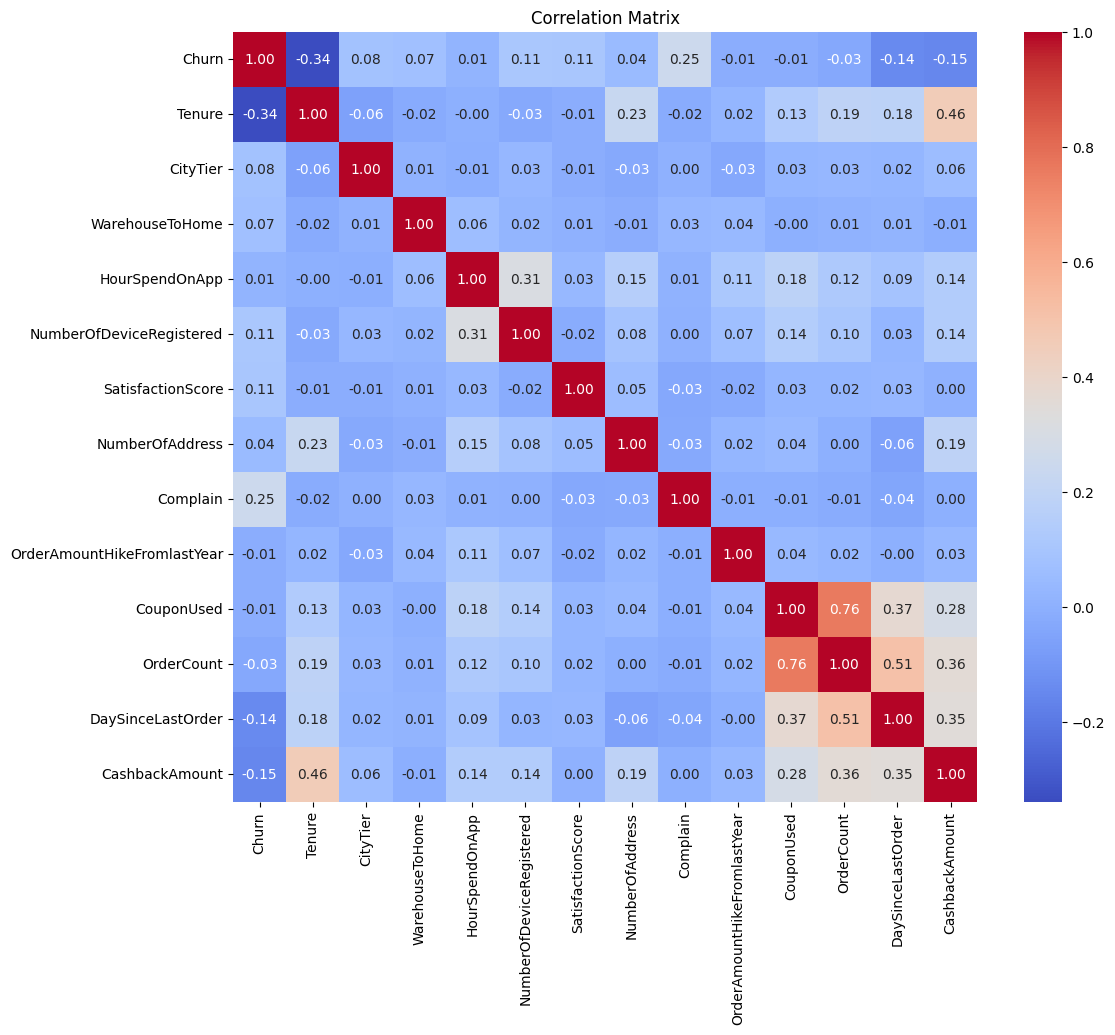

In [ ]:
matrix_cor = data.select_dtypes(include=['int64', 'float64']).corr()
matrix_cor

# Fig size
plt.figure(figsize=(12, 10))

# Creates a heatmap from the correlation matrix
sns.heatmap(matrix_cor, annot=True, cmap='coolwarm', fmt=".2f")

# Title
plt.title('Correlation Matrix')

# Shows the heatmap
plt.show()

Positive Correlation:

HoursOnApp and CustomerID have a correlation of 0.58, suggesting that customers with higher IDs (probably newer clients) spend more time on the app.
CouponUsed and OrderCount have a correlation of 0.64, indicating that more coupons are used by customers with a higher number of orders. It suggests that promotions and discounts are effective in increasing purchase frequency.
CashbackAmount has a relatively high positive correlation with Churn (0.51), which could imply that customers receiving more cashback might be more likely to churn. This may indicate that while cashback incentives are being utilized, they may not be effective in retaining customers in the long term and could be associated with one-time purchases or customers who are not engaged beyond the transactional benefit.
Negative Correlation:

Churn and Tenure have a correlation of -0.35, indicating that customers with longer tenure are less likely to churn, implying that efforts to keep customers engaged over time could reduce customer turnover.
Many variables show little to no correlation with each other, meaning that there may be no linear relationship or that any relationship is complex and not easily captured by correlation alone. This is an indication that customer retention strategies need to be multifaceted. While promotions may drive sales, they do not necessarily build long-term loyalty.
At this point in the analysis, the information obtained by the relationship between the numerical variables seems to indicate that it would be beneficial to focus on personalized engagement strategies that increase tenure, as well as to re-evaluate the cashback incentive programs to ensure they are contributing positively to long-term customer loyalty.

In [ ]:
var_cat = data.select_dtypes(include=['category', 'object']).columns.tolist()
print(var_cat)
print('----------------------------------')
var_num = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(var_num)

# Frequency percentages for each level of categorical variables

# Total observations
total_obs = 5630

# Loops through the categorical variables and shows the frequency percentages for each level
for var in var_cat:
    value_counts = data[var].value_counts()
    percentages = (value_counts / total_obs) * 100
    print(f'Frequency percentages of {var}:\n{percentages}\n')

['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
----------------------------------
['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Frequency percentages of PreferredLoginDevice:
Mobile      70.976909
Computer    29.023091
Name: PreferredLoginDevice, dtype: float64

Frequency percentages of PreferredPaymentMode:
Debit Card     41.101243
Credit Card    31.509769
E wallet       10.905861
COD             9.129663
UPI             7.353464
Name: PreferredPaymentMode, dtype: float64

Frequency percentages of Gender:
Male      60.106572
Female    39.893428
Name: Gender, dtype: float64

Frequency percentages of PreferedOrderCat:
Mobile                36.944938
Laptop & Accessory    36.412078
Fashion               14.671403
Grocery                7.2824

0    4682
1     948
Name: Churn, dtype: int64
-----------------------------------
0    83.16
1    16.84
Name: Churn, dtype: float64


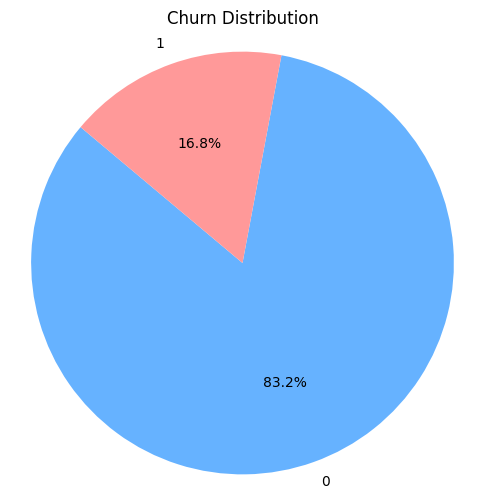

In [ ]:
# Number of observations
target_var = data['Churn'].value_counts()
print(target_var)
print("-----------------------------------")

# Percentage of observations
percentage = round((target_var/total_obs)*100, 2)
print(percentage)

#Pie chart
colors = ['#66B2FF', '#FF9999']

plt.figure(figsize=(6, 6))
plt.pie(percentage, labels=percentage.index,
        autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

Relationship between the satisfactory score of customer on service (SatisfactionScore) and the preferred payment method (PaymentMode).

The preferred payment method may be related to customer convenience. Understanding how this affects their level of satisfaction can help adapt and promote more satisfactory payment methods.

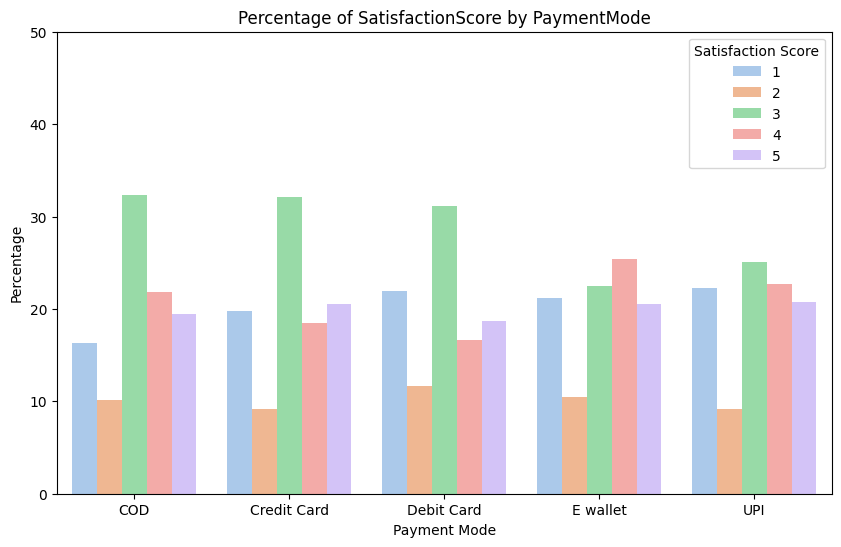

In [ ]:
# Percentages for each category
total = len(data)
counts = data.groupby(['PreferredPaymentMode', 'SatisfactionScore']).size().unstack()
counts = counts.divide(counts.sum(axis=1), axis=0) * 100

# Reshapes the data for plotting
counts = counts.stack().reset_index(name='Percentage')

# Creates a count plot with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x='PreferredPaymentMode', y='Percentage', hue='SatisfactionScore', data=counts, palette='pastel')
plt.title('Percentage of SatisfactionScore by PaymentMode')
plt.xlabel('Payment Mode')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction Score')
plt.ylim(0, 50)  # Set y-axis limits from 0 to 100 for percentages
plt.show()

Relationship between marital status (MaritalStatus) and days since last order (DaySinceLastOrder)

Marital status could be related to purchasing behavior. Understanding whether there is any relationship between marital status and time since last order could help adjust marketing strategies or specific services for different demographic groups.

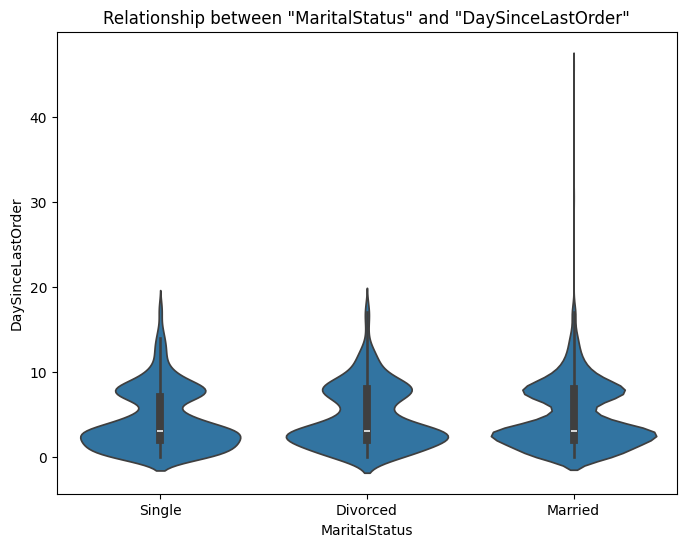

Device: Single
Q1: 2.00
Median: 3.00
Q3: 7.00

Device: Divorced
Q1: 2.00
Median: 3.00
Q3: 8.00

Device: Married
Q1: 2.00
Median: 3.00
Q3: 8.00



In [ ]:
# Creating a violin plot using Seaborn
plt.figure(figsize=(8, 6))
sns.violinplot(x="MaritalStatus", y="DaySinceLastOrder", data=data)
plt.title('Relationship between "MaritalStatus" and "DaySinceLastOrder"')
plt.xlabel("MaritalStatus")
plt.ylabel("DaySinceLastOrder")

plt.show()

# Empty dictionary to store quartiles for each marital status
quartiles_status = {}

# Iterates through unique device categories
for status in data['MaritalStatus'].unique():
    # Selects data for the current device
    status_data = data['DaySinceLastOrder'][data['MaritalStatus'] == status]

    # Calculates the quartiles
    q1 = status_data.quantile(0.25)
    q2 = status_data.quantile(0.5)
    q3 = status_data.quantile(0.75)

    # Stores quartiles in the dictionary
    quartiles_status[status] = {'Q1': q1, 'Median': q2, 'Q3': q3}

# Prints quartiles for each device
for status, quartiles in quartiles_status.items():
    print(f"Device: {status}")
    print(f"Q1: {quartiles['Q1']:.2f}")
    print(f"Median: {quartiles['Median']:.2f}")
    print(f"Q3: {quartiles['Q3']:.2f}")
    print()

The distributions for "Single", "Divorced", and "Married" categories are very similar. There doesn't seem to be a need to differentiate services or products based on marital status alone, given the similarity in order frequency across the groups.

Overall, the company's strategies for customer engagement and retention seem to be working similarly across different marital statuses, suggesting a generally universal appeal of their services or products.

Relationship between the percentage increases in order from last year (OrderAmountHikeFromlastYear) and the city tier (CityTier)

Knowing which city tiers are experiencing higher growth rates can help in strategic planning. The company can decide where to focus its efforts, be it in maintaining the lead in high-growth areas or improving in lower-growth areas.

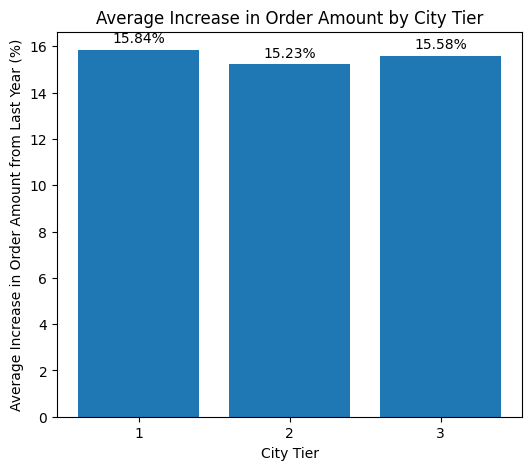

In [ ]:
# Groups the data by 'CityTier' and calculates the average increase
avg_increase = data.groupby('CityTier')['OrderAmountHikeFromlastYear'].mean().reset_index()

# Creates a bar plot for the averages
plt.figure(figsize=(6, 5))
bars = plt.bar(avg_increase['CityTier'], avg_increase['OrderAmountHikeFromlastYear'])
plt.xlabel('City Tier')
plt.ylabel('Average Increase in Order Amount from Last Year (%)')
plt.title('Average Increase in Order Amount by City Tier')

# Sets X-axis ticks to show only 1, 2, and 3
plt.xticks([ 1, 2, 3], ['1', '2', '3'])

# Bars with their respective percentages
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

The differences between the tiers are minimal, Indicating a fairly uniform increase across different city tiers. This suggests that the company's market penetration strategies are effective across diverse urban settings. Although the data reflects positive growth across all city tiers, the relatively even growth across tiers might also indicate that there is not a significant untapped market in any particular tier, which could suggest that the company is nearing market saturation and might need to innovate or expand to new tiers or markets for further growth.

In general, it seems to be a good indicator. However, to ensure continued growth, the company should consider exploring innovation or expansion into new tiers or markets. This diversification can help the company access new customer segments and maintain its growth trajectory.